In [103]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [105]:
df1=pd.read_csv('mnist_test.csv')

In [106]:
df2=pd.read_csv('mnist_train.csv')

In [107]:
X_test=df1.drop('label',axis=1).values

In [108]:
Y_test=df1['label']

In [109]:
X_train=df2.drop('label',axis=1).values

In [110]:
Y_train=df2['label']

In [111]:
X_train=X_train/255.0

In [112]:
X_test=X_test/255.0

In [113]:
X_train=X_train.reshape((60000,28,28))

In [114]:
X_test=X_test.reshape((10000,28,28))

In [125]:
X_train.shape

(60000, 28, 28)

In [124]:
Y_train.shape

(60000, 10)

In [117]:
X_test.shape

(10000, 28, 28)

In [122]:
Y_test.shape

(10000, 10)

In [119]:
Y_train=to_categorical(Y_train)
Y_test=to_categorical(Y_test)

In [123]:
Y_test[1].shape

(10,)

In [126]:
model = models.Sequential()
model.add(layers.Flatten(input_shape=(28,28)))
model.add(layers.Dense(50, activation='relu'))
model.add(layers.Dense(50, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [127]:
model.fit(X_train, Y_train, epochs=50, batch_size=64, validation_split=0.2)

Epoch 1/50
750/750 [==============================] - 3s 3ms/step - loss: 0.3912 - accuracy: 0.8881 - val_loss: 0.2036 - val_accuracy: 0.9415
Epoch 2/50
750/750 [==============================] - 2s 2ms/step - loss: 0.1759 - accuracy: 0.9483 - val_loss: 0.1712 - val_accuracy: 0.9483
Epoch 3/50
750/750 [==============================] - 2s 2ms/step - loss: 0.1332 - accuracy: 0.9601 - val_loss: 0.1288 - val_accuracy: 0.9635
Epoch 4/50
750/750 [==============================] - 2s 2ms/step - loss: 0.1045 - accuracy: 0.9681 - val_loss: 0.1256 - val_accuracy: 0.9637
Epoch 5/50
750/750 [==============================] - 2s 2ms/step - loss: 0.0897 - accuracy: 0.9723 - val_loss: 0.1205 - val_accuracy: 0.9639
Epoch 6/50
750/750 [==============================] - 2s 2ms/step - loss: 0.0758 - accuracy: 0.9771 - val_loss: 0.1217 - val_accuracy: 0.9629
Epoch 7/50
750/750 [==============================] - 2s 2ms/step - loss: 0.0654 - accuracy: 0.9796 - val_loss: 0.1036 - val_accuracy: 0.9693
Epoch 

In [128]:
model.evaluate(X_test,Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1881 - accuracy: 0.9710


[0.18812456727027893, 0.9710000157356262]

In [113]:
X_test[1].shape


(28, 28)

In [130]:
pred=model.predict(X_test)

313/313 [==============================] - 0s 1ms/step


In [132]:
np.argmax(pred[150])

9

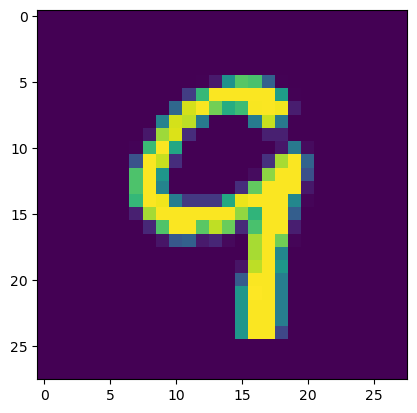

In [133]:
plt.imshow(X_test[150])
plt.show()

In [134]:
import cv2

In [135]:
image=cv2.imread('Sudoku_Puzzle_by_L2G-20050714_standardized_layout.svg.png')

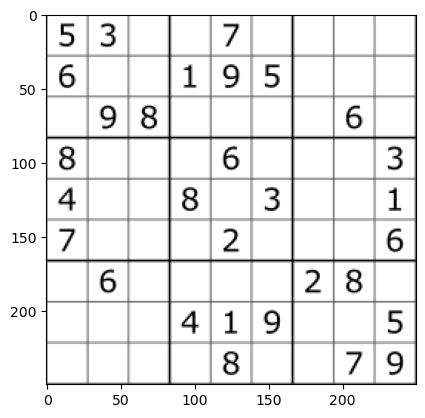

In [136]:
plt.imshow(image)

In [137]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

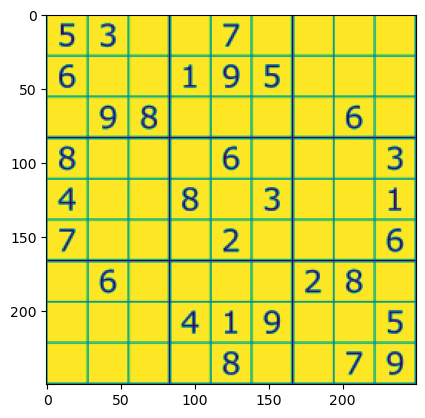

In [146]:
plt.imshow(gray)

In [138]:
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

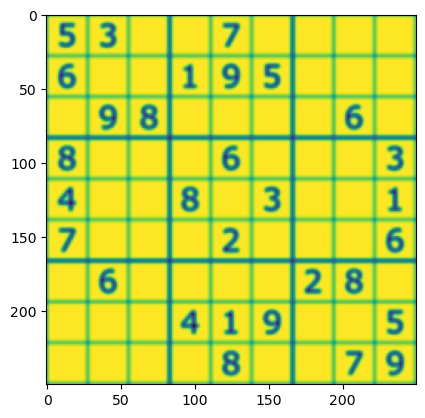

In [147]:
plt.imshow(blurred)

In [139]:
edges = cv2.Canny(blurred, 50, 150)

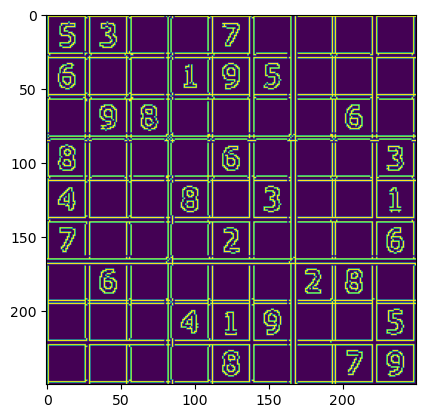

In [148]:
plt.imshow(edges)

In [140]:
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [141]:
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:1]

In [142]:
x, y, w, h = cv2.boundingRect(contours[0])

In [143]:
sudoku_grid = image[y:y+h, x:x+w]

In [144]:
cell_size = w // 9
cells = []b

for i in range(9):
    for j in range(9):
        cell = sudoku_grid[i * cell_size:(i + 1) * cell_size, j * cell_size:(j + 1) * cell_size]
        cell = cv2.resize(cell, (28, 28))  
        cell = cell.astype('float32') / 255.0
        cells.append(cell)

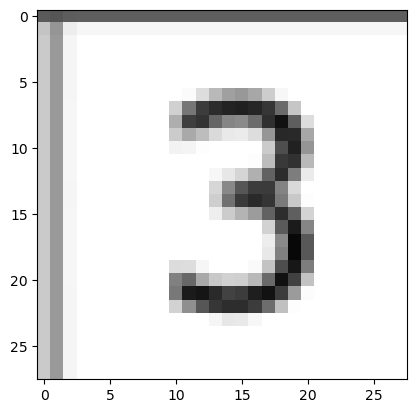

In [151]:
plt.imshow(cells[1])
plt.show()

In [154]:
cells[1].shape

(28, 28, 3)

In [156]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_18 (Dense)            (None, 50)                39250     
                                                                 
 dense_19 (Dense)            (None, 50)                2550      
                                                                 
 dense_20 (Dense)            (None, 10)                510       
                                                                 
Total params: 42310 (165.27 KB)
Trainable params: 42310 (165.27 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [157]:
img = cells[1].resize((28, 28))

In [163]:
cells[1].shape

(28, 28)

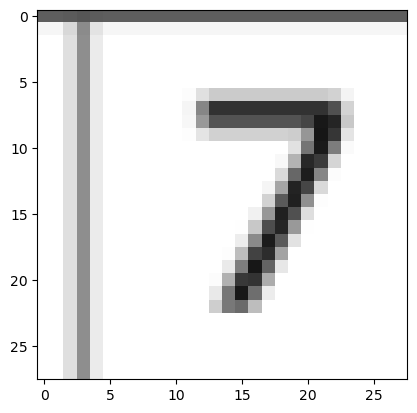

In [170]:
plt.imshow(cells[4])

In [ ]:
i=cells[1]

In [181]:
import cv2
import numpy as np

# Load the image
image_path = 'Sudoku_Puzzle_by_L2G-20050714_standardized_layout.svg.png'  # Replace with the path to your image
image = cv2.imread(image_path)

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply thresholding to obtain a binary image
_, thresholded = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY)

# Find contours in the binary image
contours, _ = cv2.findContours(thresholded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Iterate over contours and find corners
for contour in contours:
    # Approximate the contour to reduce the number of points
    epsilon = 0.04 * cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, epsilon, True)

    # Draw the contour and corners on the original image
    cv2.drawContours(image, [approx], 0, (0, 255, 0), 2)

    for corner in approx:
        x, y = corner[0]
        cv2.circle(image, (x, y), 5, (0, 0, 255), -1)

# Display the image with contours and corners
cv2.imshow('Contours and Corners', image)
cv2.waitKey(0)
cv2.destroyAllWindows()
